# This is my 16. global daily news project with 96% score Extra Tree

# Import Required Libraries

In [1]:
# Data handling
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Preprocessing & splitting
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.impute import SimpleImputer

# NLP
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from imblearn.over_sampling import SMOTE
from collections import Counter

# Evaluation metrics
from sklearn.metrics import (accuracy_score,precision_score,recall_score,f1_score,
    classification_report,confusion_matrix,auc,roc_auc_score, roc_curve
)

# Regression Models
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# XGBoost
from xgboost import XGBClassifier
# Warnings
import warnings
warnings.filterwarnings("ignore")

# Save the model
import joblib

# Data Exploration

In [2]:
data = pd.read_csv('Google_Daily_News.csv')
data.head()

,category,datetime,headline,id,image,related,source,summary,url
0,company,1745449200,"Alphabet earnings, Fed comments, Nintendo Swit...",134059226,https://s.yimg.com/rz/stage/p/yahoo_finance_en...,GOOGL,Yahoo,Here's what investors are watching on Thursday...,https://finnhub.io/api/news?id=5381fda0f641074...
1,company,1745446095,Is Alphabet Inc. (GOOGL) the Best Stock to Buy...,134059227,https://s.yimg.com/rz/stage/p/yahoo_finance_en...,GOOGL,Yahoo,We recently published a list of 10 Best Stocks...,https://finnhub.io/api/news?id=bdc5b5103ae73db...
2,company,1745442355,Is Alphabet Inc. (GOOG) the Best Stock to Buy ...,134059228,https://s.yimg.com/rz/stage/p/yahoo_finance_en...,GOOGL,Yahoo,We recently published a list of 20 Best Stocks...,https://finnhub.io/api/news?id=8cdf3969c1ec9e3...
3,company,1745440328,Google earnings are coming today. Here's what ...,134059229,https://s.yimg.com/rz/stage/p/yahoo_finance_en...,GOOGL,Yahoo,Google (GOOGL) will report first-quarter 2025 ...,https://finnhub.io/api/news?id=ed468a233b607bd...
4,company,1745439372,Equity Markets Close Higher Over Potential Red...,134059230,https://s.yimg.com/rz/stage/p/yahoo_finance_en...,GOOGL,Yahoo,US benchmark equity indexes closed higher on W...,https://finnhub.io/api/news?id=54bdad840d13d87...


In [3]:
data.shape

(231, 9)

In [4]:
data["url"][0]

'https://finnhub.io/api/news?id=5381fda0f64107479e57e667e05aedac92a8ea8f9d11b882b7eb47b954e7703c'

In [5]:
data["image"][0]

'https://s.yimg.com/rz/stage/p/yahoo_finance_en-US_h_p_finance_2.png'

# EDA

In [6]:
data.drop(['image','id','datetime','url'],axis=1,inplace=True)
data.head()

,category,headline,related,source,summary
0,company,"Alphabet earnings, Fed comments, Nintendo Swit...",GOOGL,Yahoo,Here's what investors are watching on Thursday...
1,company,Is Alphabet Inc. (GOOGL) the Best Stock to Buy...,GOOGL,Yahoo,We recently published a list of 10 Best Stocks...
2,company,Is Alphabet Inc. (GOOG) the Best Stock to Buy ...,GOOGL,Yahoo,We recently published a list of 20 Best Stocks...
3,company,Google earnings are coming today. Here's what ...,GOOGL,Yahoo,Google (GOOGL) will report first-quarter 2025 ...
4,company,Equity Markets Close Higher Over Potential Red...,GOOGL,Yahoo,US benchmark equity indexes closed higher on W...


In [7]:
data.isna().sum()

category     0
headline     0
related      0
source       0
summary     41
dtype: int64

# Handle missing values automatically

In [8]:
for col in data.columns:
    if data[col].dtype in ["int64", "float64"]:   # Numeric columns
        data[col] = data[col].fillna(data[col].median())
    else:                                         # Categorical columns
        data[col] = data[col].fillna(data[col].mode()[0])

print("All missing values handled!")
print(data.isnull().sum())

All missing values handled!
category    0
headline    0
related     0
source      0
summary     0
dtype: int64


# Checking for all column number unique 

In [9]:
for i in data.columns:
    print(f"{i}")
    print(f"{data[i].nunique()}")

category
1
headline
231
related
1
source
5
summary
188


# Drop for useless columns

In [10]:
data.drop(columns=['category', 'related'], inplace=True)

# Check for feature columns

In [11]:
data['headline'][0]

'Alphabet earnings, Fed comments, Nintendo Switch 2: What to Watch'

In [12]:
data['summary'][0]

"Here's what investors are watching on Thursday, April 24. Procter & Gamble (PG), Merck (MRK), and PepsiCo (PEP) are set to release quarterly results before the opening bell, while Alphabet (GOOG, GOOGL), T-Mobile (TMUS), and Intel (INTC) are on deck to report after the market close. Minneapolis Federal Reserve President Neel Kashkari will deliver remarks. Nintendo (NTDOY, 7974.T) will kick off Switch 2 pre-orders in the US and Canada. To watch more expert insights and analysis on the latest market action, check out more Market Domination Overtime here."

# Cleaning for feature columns

In [13]:
def clean_text(text):
    if pd.isnull(text):
        return ""
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)   # remove punctuation
    text = re.sub(r'\d+', '', text)       # remove digits
    return text

def clean_multiple_columns(df, columns):
    for col in columns:
        data[col] = data[col].astype(str).apply(clean_text)
    return data


In [14]:
data = pd.DataFrame(data)

# Columns to clean
text_columns = ['headline', 'summary']

# Clean them
data = clean_multiple_columns(data, text_columns)

# After cleaning columns

In [15]:
data['headline'][0]

'alphabet earnings fed comments nintendo switch  what to watch'

In [16]:
data['summary'][0]

'heres what investors are watching on thursday april  procter  gamble pg merck mrk and pepsico pep are set to release quarterly results before the opening bell while alphabet goog googl tmobile tmus and intel intc are on deck to report after the market close minneapolis federal reserve president neel kashkari will deliver remarks nintendo ntdoy t will kick off switch  preorders in the us and canada to watch more expert insights and analysis on the latest market action check out more market domination overtime here'

In [17]:
data.head()

,headline,source,summary
0,alphabet earnings fed comments nintendo switch...,Yahoo,heres what investors are watching on thursday ...
1,is alphabet inc googl the best stock to buy an...,Yahoo,we recently published a list of best stocks t...
2,is alphabet inc goog the best stock to buy acc...,Yahoo,we recently published a list of best stocks t...
3,google earnings are coming today heres what to...,Yahoo,google googl will report firstquarter earning...
4,equity markets close higher over potential red...,Yahoo,us benchmark equity indexes closed higher on w...


# Use sklearn's built-in stopwords

In [18]:
stop_words = set(ENGLISH_STOP_WORDS)

# Function to remove stopwords only (no lowercase or punctuation)

In [19]:
def remove_stopwords_sklearn(text):
    if pd.isnull(text):
        return ""
    words = text.split()
    filtered = [word for word in words if word.lower() not in stop_words]
    return " ".join(filtered)

# Apply to 'summary' and 'headline' columns

In [20]:
for col in ['summary', 'headline']:
    data[col] = data[col].astype(str).apply(remove_stopwords_sklearn)

# Now `data` has stopwords removed permanently from both columns

In [21]:
data['summary'][0]

'heres investors watching thursday april procter gamble pg merck mrk pepsico pep set release quarterly results opening bell alphabet goog googl tmobile tmus intel intc deck report market close minneapolis federal reserve president neel kashkari deliver remarks nintendo ntdoy t kick switch preorders canada watch expert insights analysis latest market action check market domination overtime'

In [22]:
data['headline'][0]

'alphabet earnings fed comments nintendo switch watch'

# Check Target column value counts

In [23]:
source_vc  = data["source"].value_counts()
source_vc

source
Yahoo           155
SeekingAlpha     44
Finnhub          14
MarketWatch      13
DowJones          5
Name: count, dtype: int64

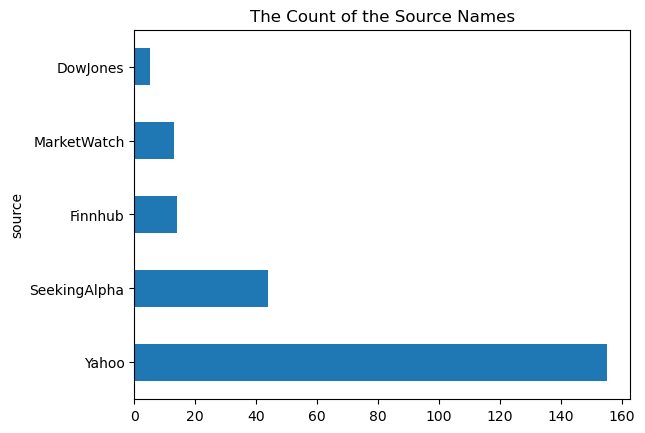

In [24]:
source_vc.plot(kind='barh',title='The Count of the Source Names')
plt.show()

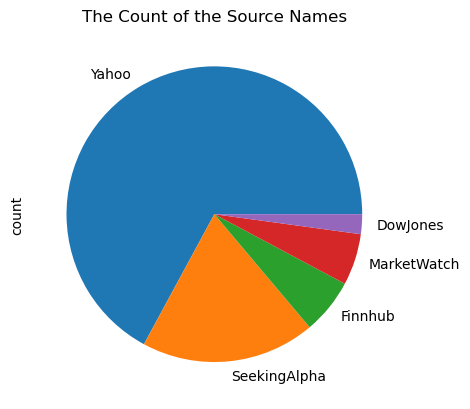

In [25]:
source_vc.plot(kind='pie',title='The Count of the Source Names')
plt.show()

# Target column maximum value counts

In [32]:
max_count = data['source'].value_counts().max()
max_count

155

In [33]:
upsampled_list = []

In [34]:
from sklearn.utils import resample
for cls in data['source'].unique():
    cls_data = data[data['source'] == cls]
    cls_upsampled = resample(
        cls_data,
        replace=True,
        n_samples=max_count,
        random_state=42
    )
    upsampled_list.append(cls_upsampled)

In [35]:
data_balanced = pd.concat(upsampled_list)

In [36]:
data_balanced = data_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# After Balancing

In [37]:
print("\nAfter balancing:")
print(data_balanced['source'].value_counts())


After balancing:
source
MarketWatch     155
DowJones        155
Finnhub         155
SeekingAlpha    155
Yahoo           155
Name: count, dtype: int64


# Swap Variable

In [38]:
data = data_balanced

# Encoding

In [39]:
le = LabelEncoder()
cat = data.select_dtypes(include='object').columns
for i in cat:
    data[i] = le.fit_transform(data[i])

data.head(2)

,headline,source,summary
0,148,2,112
1,72,0,53


# Modeling

In [40]:
X = data.drop(['source'],axis=1)
y = data['source']

In [41]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

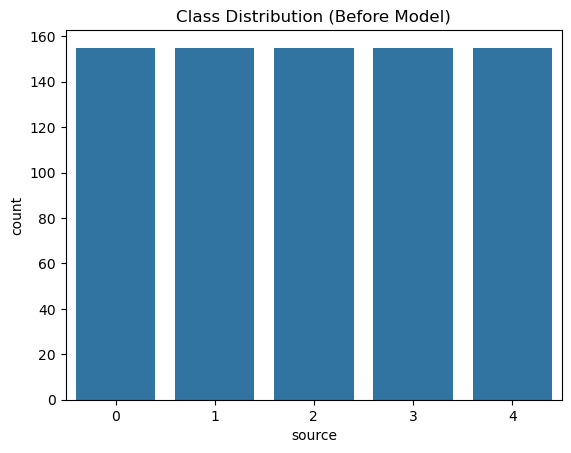

In [42]:
sns.countplot(x=y)
plt.title("Class Distribution (Before Model)")
plt.show()

# Correlation Heatmap (for numeric columns)

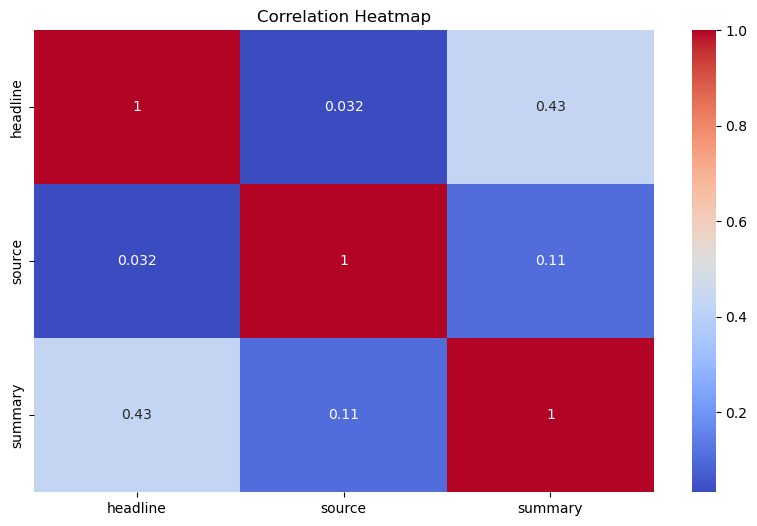

In [43]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Scale for feature columns

In [44]:
sc = StandardScaler()
for i in X:
    data[[i]] = sc.fit_transform(data[[i]])

data.head(2)

,headline,source,summary
0,1.417293,2,1.609974
1,-0.296072,0,-0.269617


# Preprocessing pipeline

In [45]:
preprocessor = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('scaler', StandardScaler())
])

# Define models & parameter grids for classification

In [46]:
models = {
    # -------------------------------
    "Naive Bayes": {
        "model": MultinomialNB(),
        "param_grid": {
            "alpha": [0.1, 0.5, 1.0]
        }
    },
    # -------------------------------
    "Logistic Regression": {
        "model": LogisticRegression(solver='lbfgs', max_iter=500, random_state=42),
        "param_grid": {
            "C": [0.1, 1, 10],
            "penalty": ['l2']
        }
    },
    # -------------------------------
    "Decision Tree": {
        "model": DecisionTreeClassifier(random_state=42),
        "param_grid": {
            "max_depth": [3, 5, 10, None],
            "min_samples_split": [2, 5, 10],
            "min_samples_leaf": [1, 2, 4]
        }
    },
    # -------------------------------
    "Random Forest": {
        "model": RandomForestClassifier(random_state=42),
        "param_grid": {
            "n_estimators": [100, 200],
            "max_depth": [None, 10, 20],
            "min_samples_split": [2, 5],
            "min_samples_leaf": [1, 2]
        }
    },
    # -------------------------------
    "Gradient Boosting": {
        "model": GradientBoostingClassifier(random_state=42),
        "param_grid": {
            "n_estimators": [100, 200],
            "learning_rate": [0.01, 0.1, 0.2],
            "max_depth": [3, 5]
        }
    },
    # -------------------------------
    "AdaBoost": {
        "model": AdaBoostClassifier(random_state=42),
        "param_grid": {
            "n_estimators": [50, 100, 200],
            "learning_rate": [0.01, 0.1, 1.0]
        }
    },
    # -------------------------------
    "Extra Trees": {
        "model": ExtraTreesClassifier(random_state=42),
        "param_grid": {
            "n_estimators": [100, 200],
            "max_depth": [None, 10, 20],
            "min_samples_split": [2, 5],
            "min_samples_leaf": [1, 2]
        }
    },
    # -------------------------------
    "K-Nearest Neighbors": {
        "model": KNeighborsClassifier(),
        "param_grid": {
            "n_neighbors": [3, 5, 7, 9],
            "weights": ["uniform", "distance"],
            "p": [1, 2]  # Manhattan (L1) or Euclidean (L2)
        }
    },
    # -------------------------------
    "MLP Classifier": {
        "model": MLPClassifier(random_state=42),
        "param_grid": {
            "hidden_layer_sizes": [(50,), (100,)],
            "activation": ["relu", "tanh"],
            "solver": ["adam"],
            "max_iter": [200]
        }
    },
    # -------------------------------
    "XGBoost": {
        "model": XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42),
        "param_grid": {
            "n_estimators": [100, 200],
            "max_depth": [3, 5, 7],
            "learning_rate": [0.01, 0.1, 0.2],
            "subsample": [0.8, 1.0],
            "colsample_bytree": [0.8, 1.0]
        }
    }
}

print(f" Total Models Loaded: {len(models)}")

 Total Models Loaded: 10


# Run GridSearchCV for each classification model

In [47]:
results = []
best_score = -float('inf')
best_model = None
best_name = None

# Run GridSearchCV for each classification model
for name, mp in models.items():
    print(f"\n Running GridSearchCV for {name}...")
    grid = GridSearchCV(mp['model'], param_grid=mp['param_grid'], cv=3, scoring='accuracy', n_jobs=-1)
    grid.fit(X_train, y_train)

    y_pred = grid.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted')
    rec = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    results.append({
        'Model': name,
        'Best Params': grid.best_params_,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1 Score': f1
    })

    print(f"{name} Best CV Score (Accuracy): {grid.best_score_:.4f}")
    print(f"{name} Best Params: {grid.best_params_}")
    print(f"{name} Classification Report:\n{classification_report(y_test, y_pred)}")

    if grid.best_score_ > best_score:
        best_score = grid.best_score_
        best_model = grid.best_estimator_
        best_name = name

# Output summary
results_df = pd.DataFrame(results)
print("\n Summary Results:")
print(results_df)

print(f"\n Best Model: {best_name}")
print(f" Best CV Score (Accuracy): {best_score:.4f}")


 Running GridSearchCV for Naive Bayes...
Naive Bayes Best CV Score (Accuracy): 0.2500
Naive Bayes Best Params: {'alpha': 0.1}
Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        38
           1       0.21      0.50      0.29        28
           2       0.37      0.42      0.39        24
           3       0.00      0.00      0.00        29
           4       0.25      0.36      0.30        36

    accuracy                           0.24       155
   macro avg       0.17      0.26      0.20       155
weighted avg       0.15      0.24      0.18       155


 Running GridSearchCV for Logistic Regression...
Logistic Regression Best CV Score (Accuracy): 0.3355
Logistic Regression Best Params: {'C': 0.1, 'penalty': 'l2'}
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.79      0.71        38
           1       0.19      0.32

# Confusion matrix

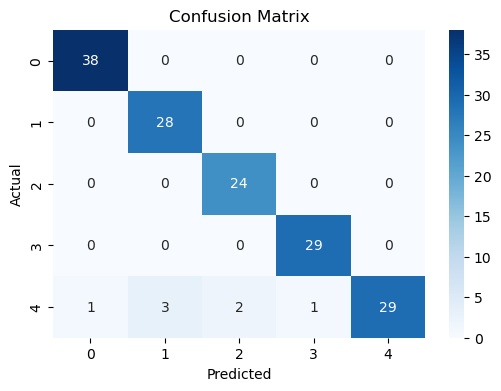

In [48]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=set(y_test), yticklabels=set(y_test))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Save the model

In [49]:
feature_columns = X.columns.to_list()
joblib.dump(feature_columns,'16.Google Daily News.joblib')

['16.Google Daily News.joblib']

In [50]:
joblib.dump(best_model,'bestmodel 16.Google Daily News.joblib')

['bestmodel 16.Google Daily News.joblib']

# If you have any suggestions, please DM me.
# Even a small message from you can make a big impact on my career

##### I am arun